In [1]:
%load_ext autoreload
%autoreload 2

import os, sys, time
import glob

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#needed to import utils.py
sys.path.append('../') 

import utils
import utils_preprocessing
import utils_exec_models
import utils_exec_models_new

import numpy as np
import pandas as pd
#to view entire text of the comuns
pd.set_option('display.max_colwidth', None) 

import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns


# Get all results CSV file

In [39]:
path = os.path.abspath('exec_results')


results_by_algorithm = []
algorithms = set()
scenarios = set()
features_configs = set()

for root, folders, files in os.walk(path, topdown=False):

    for name in files:
        if name.endswith('.csv'):

            aux = name.replace('.csv', '').replace('performance__','').split('__')
            algo = aux[0]
            feat = aux[1]
            scen = aux[2]
            es_algo = aux[3] if len(aux) == 4 else ''

            results_by_algorithm.append(
                [algo, feat, scen, es_algo, os.path.join(root, name)]
            )
            
            algorithms.add(algo)
            scenarios.add(scen)
            features_configs.add(feat)

print(algorithms, scenarios, features_configs)

{'KNeighbors', 'ComplementNB', 'RadiusNeighbors', 'DecisionTree', 'RandomForest', 'MLP', 'GaussianNB', 'SVC'} {'Single_Model', 'Ensemble_Imbalance'} {'All_Features', 'without_Diagnosis_Delay'}


# Get the performance for each $scenario$ and $features$

In [40]:
df_all = None

for algorithm, features, scenario, es_algorithm, csv_file in results_by_algorithm:
#     utils.print_string_with_separators(f'{scenario} - {features}')
    df_temp = utils.read_csv(csv_file=csv_file)

    #sort performances
    df_temp = utils_exec_models_new.sort_performances_results(df=df_temp)    

    # acumulate the performances
    if df_all is None:
        df_all = df_temp
    else:
        df_all = pd.concat([df_all, df_temp], ignore_index=True)

    
df_all = utils_exec_models_new.sort_performances_results(df=df_all).reset_index(drop=True)    

display(df_all)

# utils.print_array_as_list(df_all.columns)

,Scenario,Features,Model,balanced_accuracy,sensitivity,specificity,f1_score,AUC,accuracy,precision,...,Estimator_Class,Estimator_Hyperparams,fit_time,train_balanced_accuracy,train_sensitivity,train_specificity,train_f1_score,train_AUC,train_accuracy,train_precision
0,Ensemble_Imbalance,All_Features,Balanced Bagging,0.88,0.96,0.81,0.57,0.94,0.82,0.40,...,DecisionTreeClassifier,"{'ccp_alpha':0.0,'class_weight':'balanced','criterion':'gini','max_depth':4,'max_features':None,'max_leaf_nodes':None,'min_impurity_decrease':0.0,'min_samples_leaf':1,'min_samples_split':2,'min_weight_fraction_leaf':0.0,'random_state':42,'splitter':'best'}",0.01,0.78,0.71,0.84,0.52,0.88,0.83,0.41
1,Ensemble_Imbalance,All_Features,Balanced Bagging,0.88,0.96,0.81,0.57,0.94,0.82,0.40,...,DecisionTreeClassifier,"{'ccp_alpha':0.0,'class_weight':'balanced','criterion':'gini','max_depth':4,'max_features':None,'max_leaf_nodes':None,'min_impurity_decrease':0.0,'min_samples_leaf':1,'min_samples_split':2,'min_weight_fraction_leaf':0.0,'random_state':42,'splitter':'best'}",0.01,0.78,0.71,0.84,0.52,0.88,0.83,0.41
2,Ensemble_Imbalance,All_Features,Balanced Bagging,0.88,0.96,0.80,0.56,0.93,0.82,0.39,...,MLPClassifier,"{'activation':'tanh','alpha':0.1,'batch_size':'auto','beta_1':0.9,'beta_2':0.999,'early_stopping':False,'epsilon':1e-08,'hidden_layer_sizes':30,'learning_rate':'adaptive','learning_rate_init':0.7,'max_fun':15000,'max_iter':2000,'momentum':0.9,'n_iter_no_change':10,'nesterovs_momentum':True,'power_t':0.5,'random_state':42,'shuffle':True,'solver':'adam','tol':0.0001,'validation_fraction':0.1,'verbose':False,'warm_start':False}",0.03,0.82,0.81,0.83,0.55,0.91,0.83,0.42
3,Ensemble_Imbalance,All_Features,Balanced Bagging,0.88,0.96,0.80,0.56,0.93,0.82,0.39,...,MLPClassifier,"{'activation':'tanh','alpha':0.1,'batch_size':'auto','beta_1':0.9,'beta_2':0.999,'early_stopping':False,'epsilon':1e-08,'hidden_layer_sizes':30,'learning_rate':'adaptive','learning_rate_init':0.7,'max_fun':15000,'max_iter':2000,'momentum':0.9,'n_iter_no_change':10,'nesterovs_momentum':True,'power_t':0.5,'random_state':42,'shuffle':True,'solver':'adam','tol':0.0001,'validation_fraction':0.1,'verbose':False,'warm_start':False}",0.03,0.82,0.81,0.83,0.55,0.91,0.83,0.42
4,Ensemble_Imbalance,All_Features,Balanced Bagging,0.88,0.96,0.80,0.56,0.93,0.82,0.39,...,MLPClassifier,"{'activation':'tanh','alpha':0.1,'batch_size':'auto','beta_1':0.9,'beta_2':0.999,'early_stopping':False,'epsilon':1e-08,'hidden_layer_sizes':30,'learning_rate':'adaptive','learning_rate_init':0.7,'max_fun':15000,'max_iter':2000,'momentum':0.9,'n_iter_no_change':10,'nesterovs_momentum':True,'power_t':0.5,'random_state':42,'shuffle':True,'solver':'adam','tol':0.0001,'validation_fraction':0.1,'verbose':False,'warm_start':False}",0.03,0.82,0.81,0.83,0.55,0.91,0.83,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22125,Single_Model,without_Diagnosis_Delay,k-NN,0.49,0.00,0.98,0.00,0.49,0.87,0.00,...,NaN,NaN,0.03,0.50,0.02,0.98,0.04,0.49,0.86,0.16
22126,Single_Model,without_Diagnosis_Delay,k-NN,0.49,0.00,0.98,0.00,0.49,0.87,0.00,...,NaN,NaN,0.03,0.50,0.02,0.98,0.04,0.49,0.86,0.16
22127,Single_Model,without_Diagnosis_Delay,k-NN,0.49,0.00,0.98,0.00,0.49,0.87,0.00,...,NaN,NaN,0.03,0.50,0.02,0.98,0.04,0.49,0.86,0.16
22128,Single_Model,without_Diagnosis_Delay,k-NN,0.49,0.00,0.98,0.00,0.49,0.87,0.00,...,NaN,NaN,0.03,0.50,0.02,0.98,0.04,0.49,0.86,0.16


In [41]:
df_all.Model_Class.unique()
df_all.Estimator_Class.unique()

array(['DecisionTreeClassifier', 'MLPClassifier', 'RandomForest', 'SVC',
       nan, 'KNeighborsClassifier', 'GaussianNB', 'ComplementNB',
       'RadiusNeighborsClassifier'], dtype=object)

# Auxiliary plot function

In [42]:
def plot_performances_by_algorithm_all_features(df_aux, markers=['X', 'P'], x_y_lim_min=0.35):


    sns.set(font_scale=1.5)

    try:
        plt.style.use('seaborn-whitegrid')
    except:
        plt.style.use('seaborn-v0_8-whitegrid')


    g = sns.relplot(
        data=df_aux, 
        y="balanced_accuracy", 
        x="sensitivity",
        col="Algorithm", 
#       
        hue="Scenario", 
        style="Scenario",
        markers={"Single-Model": f"{markers[0]}", "Ensemble-Imbalance": f"{markers[1]}"},
    #
#         hue="Features", 
#         style="Scenario",
#         markers={"Single-Model": "X", "Ensemble-Imbalance": "D"},
        #
#         hue="Scenario", 
#         style="Features",
#         markers={"All_Features": "D", "without_Diagnosis_Delay": "P"},
        #

        
        kind="scatter",
        s=300,
        col_wrap=3,
    )
    plt.ylim(x_y_lim_min, 1.03)
    plt.xlim(x_y_lim_min, 1.03)

    g.refline(x=df_aux.sensitivity.max(), linestyle=":", c='red', alpha=0.5, label='')
    g.refline(y=df_aux.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.5)

    sns.move_legend(
        g, 
        "lower center", 
        bbox_to_anchor=(0.66, 0.1), 
        frameon=True, 
#         shadow=True,
        markerscale=1.7,
    )


    plt.show()

    sns.set(font_scale=1)

    
    

# Plot by algorithm using only the best performance for the _All Features_ scenario 

12 samples were saved


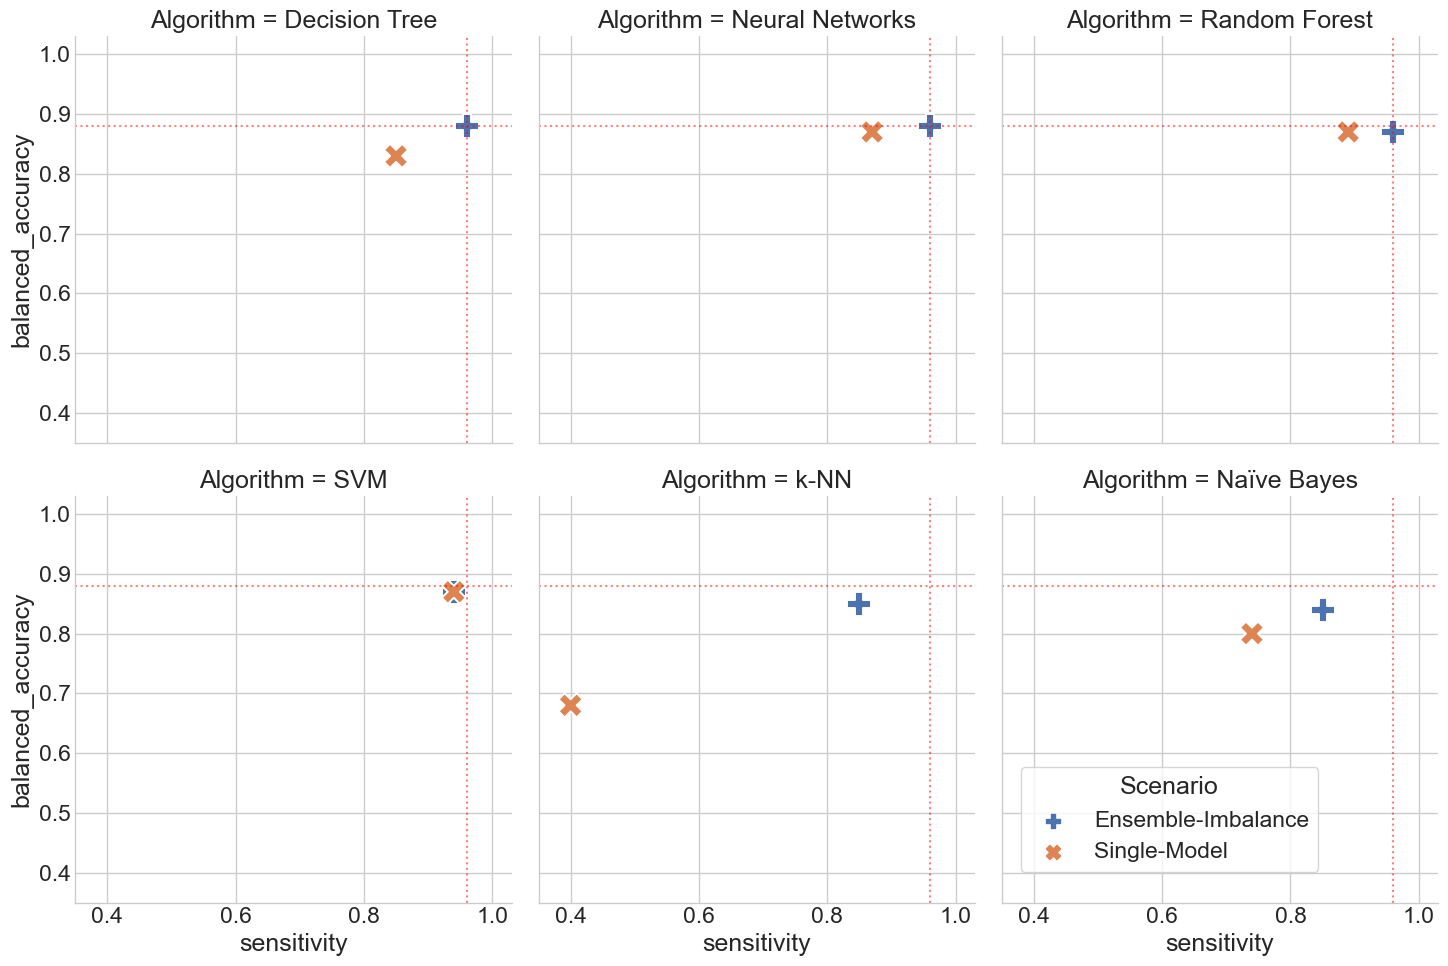

,Algorithm,Scenario,Features,Model,balanced_accuracy,sensitivity,specificity,f1_score,AUC,accuracy,...,Estimator_Class,Estimator_Hyperparams,fit_time,train_balanced_accuracy,train_sensitivity,train_specificity,train_f1_score,train_AUC,train_accuracy,train_precision
2,Decision Tree,Ensemble-Imbalance,All Features,Balanced Bagging,0.88,0.96,0.81,0.57,0.94,0.82,...,DecisionTreeClassifier,"{'ccp_alpha':0.0,'class_weight':'balanced','criterion':'gini','max_depth':4,'max_features':None,'max_leaf_nodes':None,'min_impurity_decrease':0.0,'min_samples_leaf':1,'min_samples_split':2,'min_weight_fraction_leaf':0.0,'random_state':42,'splitter':'best'}",0.01,0.78,0.71,0.84,0.52,0.88,0.83,0.41
8,Neural Networks,Ensemble-Imbalance,All Features,Balanced Bagging,0.88,0.96,0.80,0.56,0.93,0.82,...,MLPClassifier,"{'activation':'tanh','alpha':0.1,'batch_size':'auto','beta_1':0.9,'beta_2':0.999,'early_stopping':False,'epsilon':1e-08,'hidden_layer_sizes':30,'learning_rate':'adaptive','learning_rate_init':0.7,'max_fun':15000,'max_iter':2000,'momentum':0.9,'n_iter_no_change':10,'nesterovs_momentum':True,'power_t':0.5,'random_state':42,'shuffle':True,'solver':'adam','tol':0.0001,'validation_fraction':0.1,'verbose':False,'warm_start':False}",0.03,0.82,0.81,0.83,0.55,0.91,0.83,0.42
12,Random Forest,Ensemble-Imbalance,All Features,Balanced Random Forest,0.87,0.96,0.79,0.55,0.93,0.81,...,RandomForest,,0.01,0.81,0.80,0.82,0.53,0.89,0.82,0.40
14,SVM,Ensemble-Imbalance,All Features,Balanced Bagging,0.87,0.94,0.81,0.56,0.93,0.82,...,SVC,"{'C':3,'break_ties':False,'cache_size':200,'class_weight':'balanced','coef0':0.0,'decision_function_shape':'ovr','degree':3,'gamma':'auto','kernel':'rbf','max_iter':-1,'probability':True,'random_state':42,'shrinking':True,'tol':0.001,'verbose':False}",0.32,0.83,0.81,0.85,0.57,0.91,0.84,0.44
15,SVM,Single-Model,All Features,SVM,0.87,0.94,0.80,0.54,0.93,0.81,...,,,0.03,0.82,0.80,0.84,0.56,0.90,0.84,0.43
13,Random Forest,Single-Model,All Features,Random Forest,0.87,0.89,0.86,0.60,0.92,0.86,...,,,0.01,0.80,0.72,0.88,0.56,0.90,0.86,0.47
9,Neural Networks,Single-Model,All Features,Neural Networks,0.87,0.87,0.87,0.61,0.94,0.87,...,,,0.01,0.50,0.27,0.73,0.06,0.64,0.67,0.03
6,k-NN,Ensemble-Imbalance,All Features,Balanced Bagging,0.85,0.85,0.85,0.57,0.90,0.85,...,KNeighborsClassifier,"{'algorithm':'auto','leaf_size':30,'metric':'euclidean','metric_params':None,'n_jobs':None,'n_neighbors':5,'p':2,'weights':'distance'}",0.19,0.78,0.70,0.85,0.52,0.86,0.83,0.41
4,Naïve Bayes,Ensemble-Imbalance,All Features,Balanced Bagging,0.84,0.85,0.83,0.54,0.90,0.83,...,GaussianNB,"{'priors':None,'var_smoothing':1e-09}",0.02,0.80,0.75,0.85,0.54,0.88,0.84,0.43
3,Decision Tree,Single-Model,All Features,Decision Tree,0.83,0.85,0.81,0.53,0.88,0.82,...,,,0.01,0.76,0.75,0.77,0.46,0.84,0.77,0.33


In [44]:
df_all.fillna('', inplace=True)

df_all['Algorithm'] = df_all.Estimator_Class + ' ' + df_all.Model_Class    
df_all.Algorithm = df_all.Algorithm.str.replace('BalancedBagging', '').str.replace('Classifier', '').str.strip()

df_all.Algorithm = df_all.Algorithm.str.replace('BalancedRandomForest', '').str.replace('Classifier', '').str.strip()


df_all.sort_values(by=['Algorithm'], inplace=True)

# print(df_all.Algorithm.unique())

df_all[['Algorithm', 'Estimator', 'Model', 'Model_Class', 'Estimator_Class']]



df_aux = df_all.loc[(df_all.Features == 'All_Features')]

df_aux.sort_values(by=['balanced_accuracy','sensitivity','specificity'], 
                   ascending=[False, False, False], inplace=True)

df_aux = df_aux.groupby(by=['Algorithm','Scenario']).first().reset_index()

df_aux.Scenario = df_aux.Scenario.str.replace('_', '-')
df_aux.Features = df_aux.Features.str.replace('_', ' ')

df_aux = df_aux.loc[
    (df_aux.Algorithm != 'ComplementNB')
   &(df_aux.Algorithm != 'RadiusNeighbors')
]


df_aux.Algorithm = df_aux.Algorithm.apply(lambda x: utils.get_model_description(x))

df_aux.sort_values(by=['balanced_accuracy','sensitivity','specificity'], 
                   ascending=[False, False, False], inplace=True)

# df_aux = utils_exec_models_new.sort_performances_results(df=df_aux)

    
df_performances = df_aux.copy()    
    
    
utils.save_to_csv(df=df_performances, csv_file=f'{path}/best_results.csv')    
    
plot_performances_by_algorithm_all_features(
    df_performances, 
    markers=['X', 'P']
)

display(df_performances)


---
---
---
# O T H E R S
---
---
---

# Plot by algorithm using only the best performance for each scenario 

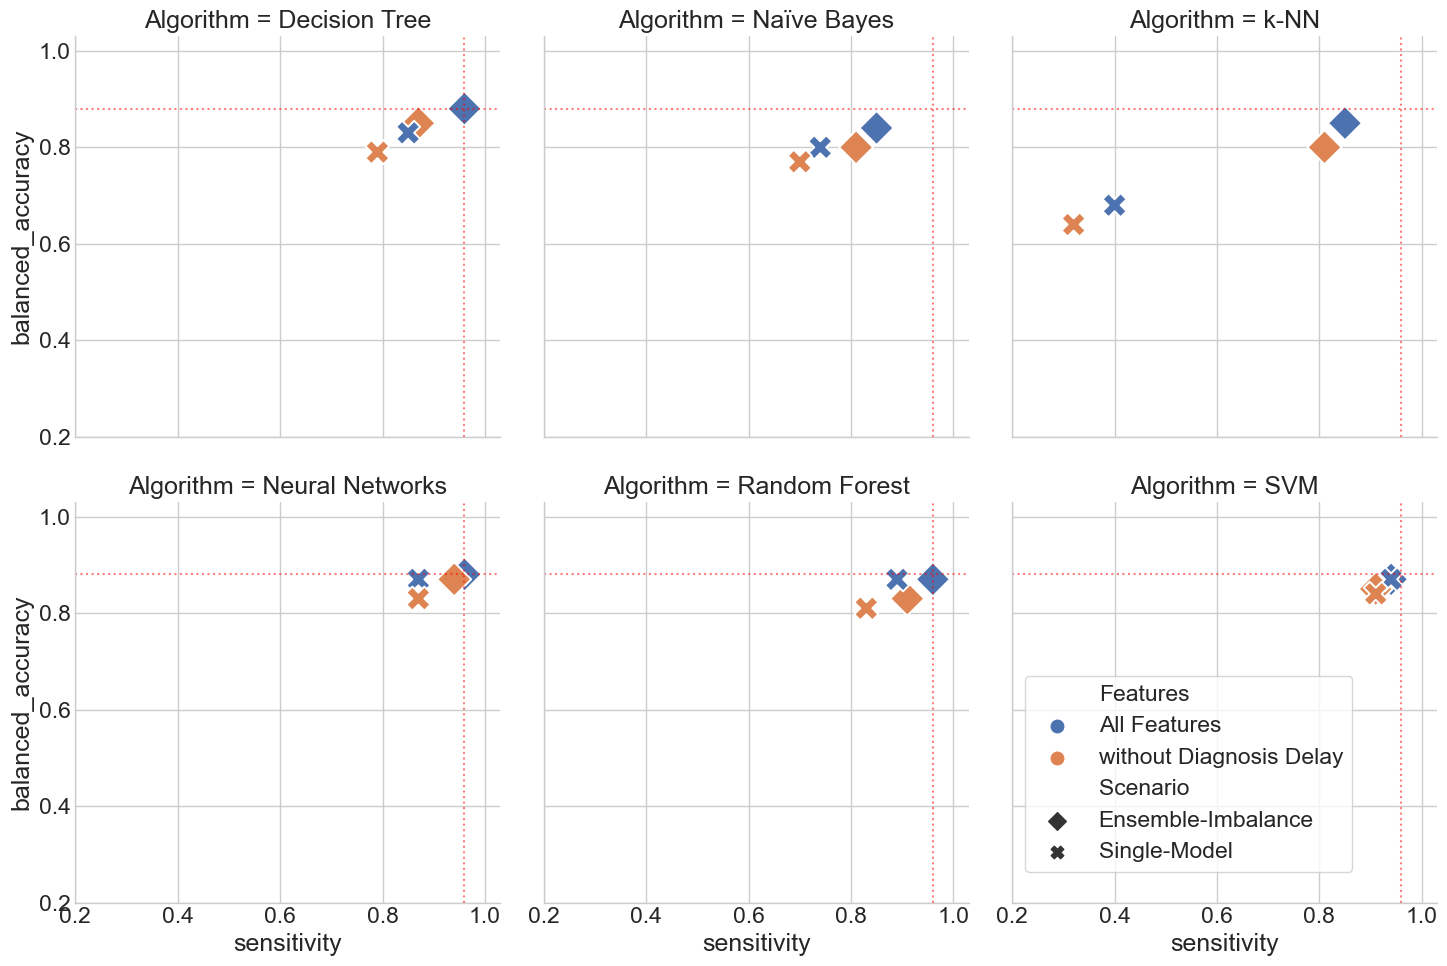

In [26]:
def plot_performances_by_algorithm(df_aux):


    sns.set(font_scale=1.5)

    try:
        plt.style.use('seaborn-whitegrid')
    except:
        plt.style.use('seaborn-v0_8-whitegrid')


    g = sns.relplot(
        data=df_aux, 
        y="balanced_accuracy", 
        x="sensitivity",
        col="Algorithm", 
#       
#         hue="Scenario", 
#         style="Scenario",
#         markers={"Single-Model": "X", "Ensemble-Imbalance": "P"},
# #         style="Scenario_Features",
    #
        hue="Features", 
        style="Scenario",
        markers={"Single-Model": "X", "Ensemble-Imbalance": "D"},
        #
#         hue="Scenario", 
#         style="Features",
#         markers={"All_Features": "D", "without_Diagnosis_Delay": "P"},
        #

        
        kind="scatter",
        s=300,
        col_wrap=3,
    )
    plt.ylim(0.2, 1.03)
    plt.xlim(0.2, 1.03)

    g.refline(x=df_aux.sensitivity.max(), linestyle=":", c='red', alpha=0.5, label='')
    g.refline(y=df_aux.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.5)

    sns.move_legend(
        g, 
        "lower center", 
        bbox_to_anchor=(0.66, 0.1), 
        frameon=True, 
#         shadow=True,
        markerscale=1.5,
    )


    plt.show()

    sns.set(font_scale=1)

    
    
df_aux = df_all.copy()

df_aux.sort_values(by=['balanced_accuracy','sensitivity','specificity'], 
                   ascending=[False, False, False], inplace=True)

df_aux = df_aux.groupby(by=['Algorithm','Scenario', 'Features']).first().reset_index()

df_aux.Scenario = df_aux.Scenario.str.replace('_', '-')
df_aux.Features = df_aux.Features.str.replace('_', ' ')

df_aux = df_aux.loc[
    (df_aux.Algorithm != 'ComplementNB')
   &(df_aux.Algorithm != 'RadiusNeighbors')
]


df_aux.Algorithm = df_aux.Algorithm.apply(lambda x: utils.get_model_description(x))

#     df_aux = utils_exec_models_new.sort_performances_results(df=df_aux).drop(columns=['index'])

# display(df_aux)

plot_performances_by_algorithm(df_aux)    

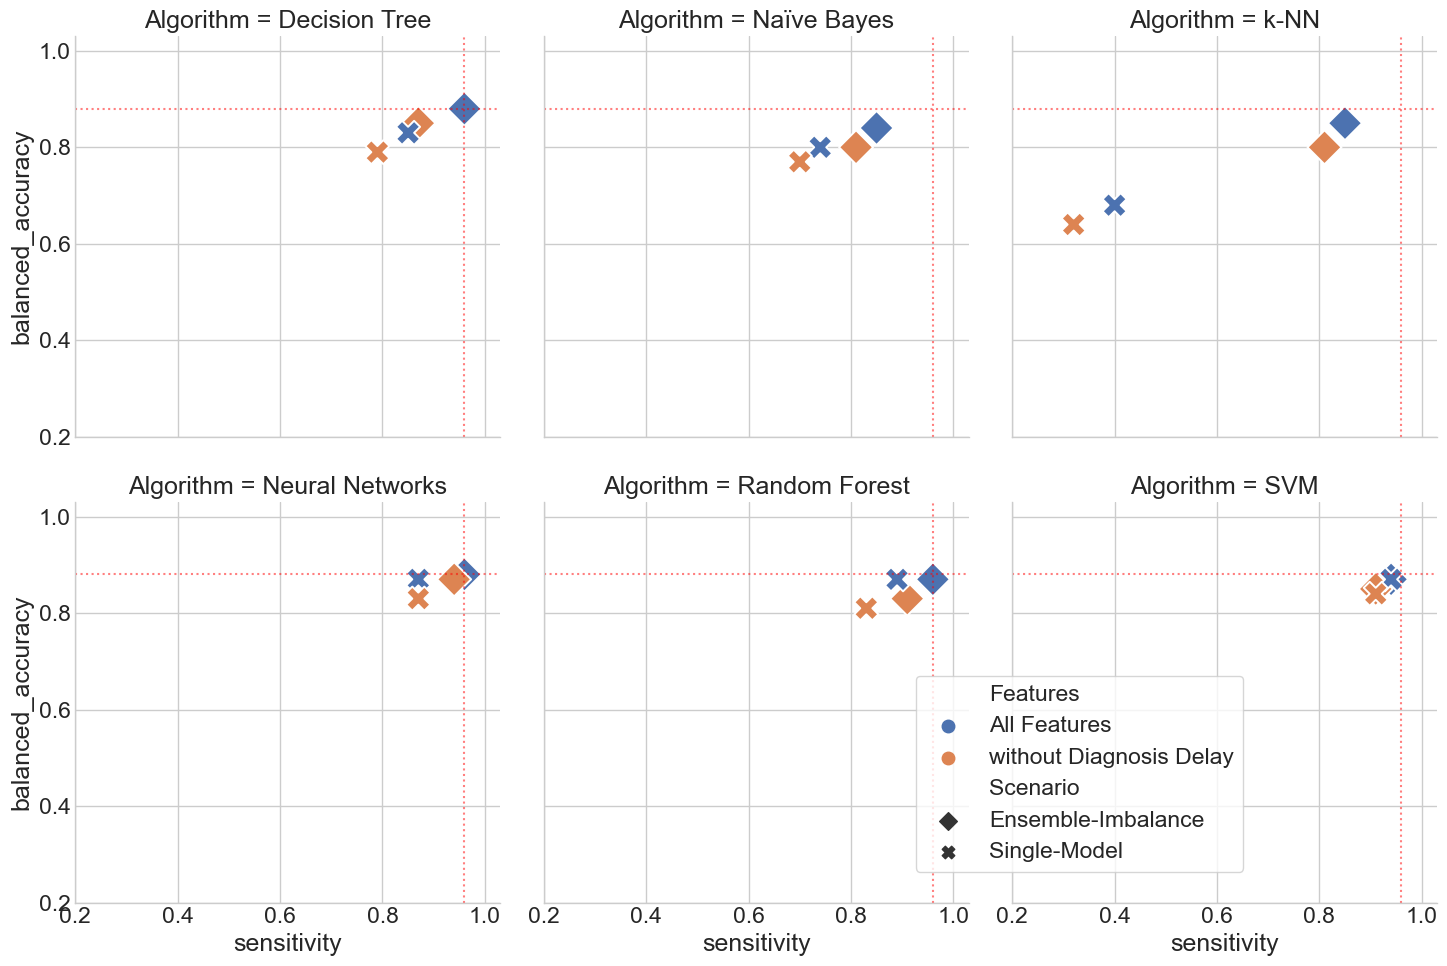

,Algorithm,Scenario,Features,Model,balanced_accuracy,sensitivity,specificity,f1_score,AUC,accuracy,...,Estimator_Class,Estimator_Hyperparams,fit_time,train_balanced_accuracy,train_sensitivity,train_specificity,train_f1_score,train_AUC,train_accuracy,train_precision
2,Decision Tree,Ensemble-Imbalance,All Features,Balanced Bagging,0.88,0.96,0.81,0.57,0.94,0.82,...,DecisionTreeClassifier,"{'ccp_alpha':0.0,'class_weight':'balanced','criterion':'gini','max_depth':4,'max_features':None,'max_leaf_nodes':None,'min_impurity_decrease':0.0,'min_samples_leaf':1,'min_samples_split':2,'min_weight_fraction_leaf':0.0,'random_state':42,'splitter':'best'}",0.01,0.78,0.71,0.84,0.52,0.88,0.83,0.41
3,Decision Tree,Single-Model,All Features,Decision Tree,0.83,0.85,0.81,0.53,0.88,0.82,...,,,0.01,0.76,0.75,0.77,0.46,0.84,0.77,0.33
4,Naïve Bayes,Ensemble-Imbalance,All Features,Balanced Bagging,0.84,0.85,0.83,0.54,0.90,0.83,...,GaussianNB,"{'priors':None,'var_smoothing':1e-09}",0.01,0.80,0.75,0.85,0.54,0.88,0.84,0.43
5,Naïve Bayes,Single-Model,All Features,Naïve Bayes,0.80,0.74,0.86,0.53,0.90,0.84,...,,,0.01,0.78,0.68,0.89,0.56,0.88,0.86,0.47
6,k-NN,Ensemble-Imbalance,All Features,Balanced Bagging,0.85,0.85,0.85,0.57,0.90,0.85,...,KNeighborsClassifier,"{'algorithm':'auto','leaf_size':30,'metric':'euclidean','metric_params':None,'n_jobs':None,'n_neighbors':5,'p':2,'weights':'distance'}",0.19,0.78,0.70,0.85,0.52,0.86,0.83,0.41
7,k-NN,Single-Model,All Features,k-NN,0.68,0.40,0.96,0.48,0.81,0.90,...,,,0.03,0.65,0.33,0.96,0.42,0.76,0.88,0.58
8,Neural Networks,Ensemble-Imbalance,All Features,Balanced Bagging,0.88,0.96,0.80,0.56,0.93,0.82,...,MLPClassifier,"{'activation':'tanh','alpha':0.1,'batch_size':'auto','beta_1':0.9,'beta_2':0.999,'early_stopping':False,'epsilon':1e-08,'hidden_layer_sizes':30,'learning_rate':'adaptive','learning_rate_init':0.7,'max_fun':15000,'max_iter':2000,'momentum':0.9,'n_iter_no_change':10,'nesterovs_momentum':True,'power_t':0.5,'random_state':42,'shuffle':True,'solver':'adam','tol':0.0001,'validation_fraction':0.1,'verbose':False,'warm_start':False}",0.03,0.82,0.81,0.83,0.55,0.91,0.83,0.42
9,Neural Networks,Single-Model,All Features,Neural Networks,0.87,0.87,0.87,0.61,0.94,0.87,...,,,0.01,0.50,0.27,0.73,0.06,0.64,0.67,0.03
12,Random Forest,Ensemble-Imbalance,All Features,Balanced Random Forest,0.87,0.96,0.79,0.55,0.93,0.81,...,RandomForest,,0.01,0.81,0.80,0.82,0.53,0.89,0.82,0.40
13,Random Forest,Single-Model,All Features,Random Forest,0.87,0.89,0.86,0.60,0.92,0.86,...,,,0.01,0.80,0.72,0.88,0.56,0.90,0.86,0.47


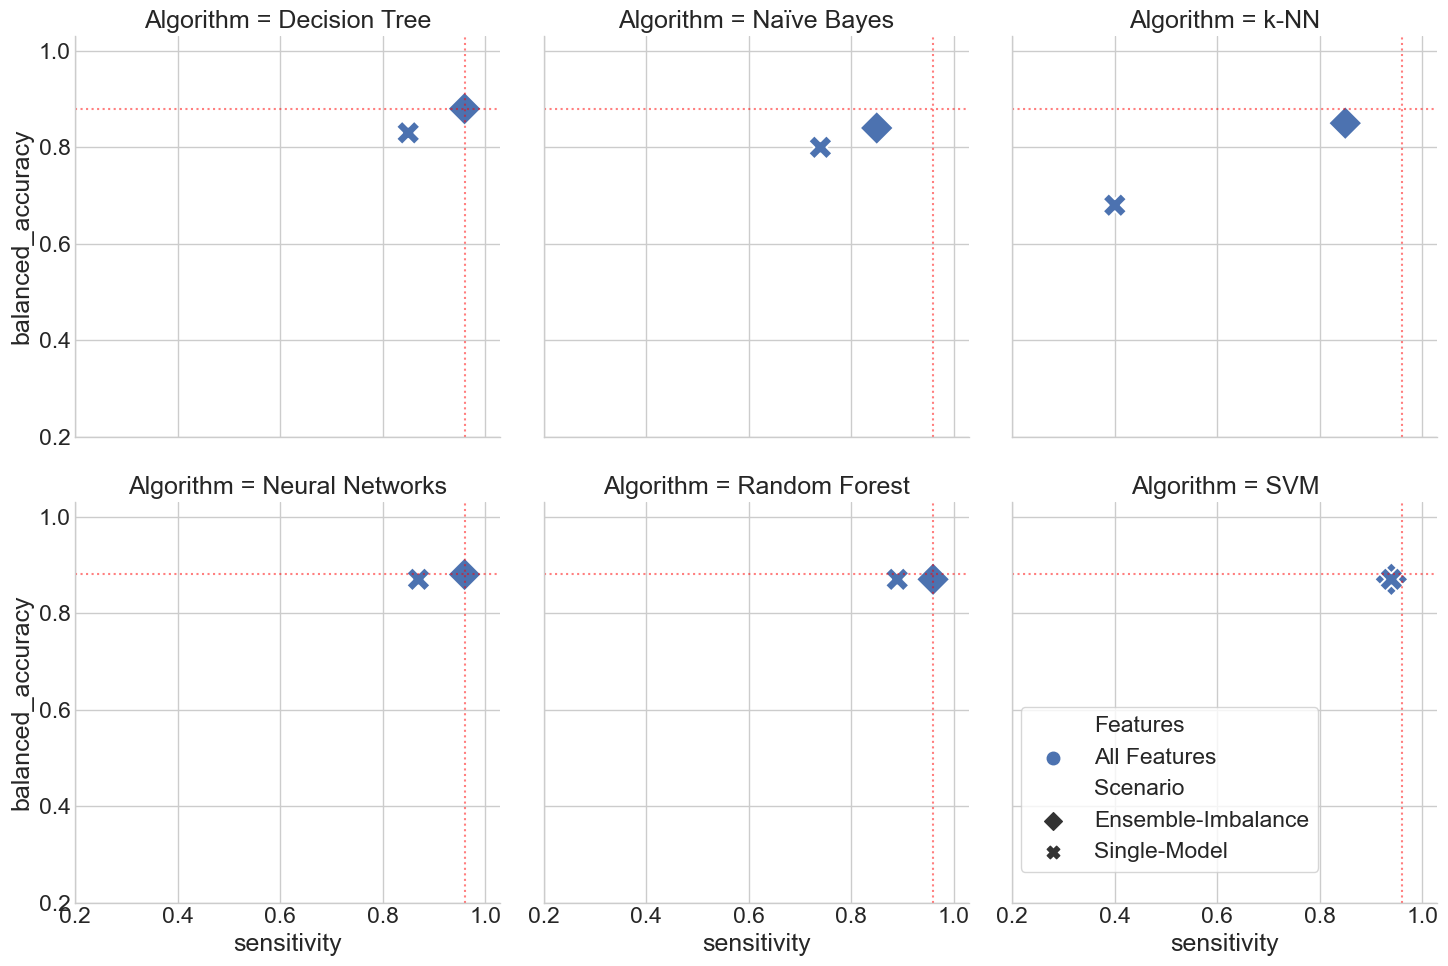

,Algorithm,Scenario,Features,Model,balanced_accuracy,sensitivity,specificity,f1_score,AUC,accuracy,...,Estimator_Class,Estimator_Hyperparams,fit_time,train_balanced_accuracy,train_sensitivity,train_specificity,train_f1_score,train_AUC,train_accuracy,train_precision
2,Decision Tree,Ensemble-Imbalance,without Diagnosis Delay,Balanced Bagging,0.85,0.87,0.82,0.54,0.88,0.82,...,DecisionTreeClassifier,"{'ccp_alpha':0.0,'class_weight':'balanced','criterion':'entropy','max_depth':7,'max_features':None,'max_leaf_nodes':None,'min_impurity_decrease':0.0,'min_samples_leaf':1,'min_samples_split':2,'min_weight_fraction_leaf':0.0,'random_state':42,'splitter':'best'}",0.01,0.76,0.67,0.85,0.50,0.84,0.83,0.40
3,Decision Tree,Single-Model,without Diagnosis Delay,Decision Tree,0.79,0.79,0.80,0.48,0.83,0.79,...,,,0.01,0.69,0.58,0.79,0.39,0.69,0.76,0.30
4,Naïve Bayes,Ensemble-Imbalance,without Diagnosis Delay,Balanced Bagging,0.80,0.81,0.79,0.48,0.87,0.79,...,GaussianNB,"{'priors':None,'var_smoothing':1e-09}",0.01,0.78,0.74,0.82,0.51,0.85,0.81,0.39
5,Naïve Bayes,Single-Model,without Diagnosis Delay,Naïve Bayes,0.77,0.70,0.84,0.49,0.88,0.82,...,,,0.01,0.76,0.65,0.87,0.51,0.85,0.84,0.43
6,k-NN,Ensemble-Imbalance,without Diagnosis Delay,Balanced Bagging,0.80,0.81,0.79,0.48,0.86,0.79,...,KNeighborsClassifier,"{'algorithm':'auto','leaf_size':30,'metric':'manhattan','metric_params':None,'n_jobs':None,'n_neighbors':5,'p':2,'weights':'distance'}",0.05,0.74,0.67,0.81,0.45,0.81,0.79,0.34
7,k-NN,Single-Model,without Diagnosis Delay,k-NN,0.64,0.32,0.96,0.39,0.75,0.88,...,,,0.03,0.63,0.29,0.97,0.38,0.74,0.88,0.57
8,Neural Networks,Ensemble-Imbalance,without Diagnosis Delay,Balanced Bagging,0.87,0.94,0.80,0.54,0.88,0.81,...,MLPClassifier,"{'activation':'relu','alpha':0.1,'batch_size':'auto','beta_1':0.9,'beta_2':0.999,'early_stopping':False,'epsilon':1e-08,'hidden_layer_sizes':(22,),'learning_rate':'adaptive','learning_rate_init':0.3,'max_fun':15000,'max_iter':2000,'momentum':0.9,'n_iter_no_change':10,'nesterovs_momentum':True,'power_t':0.5,'random_state':42,'shuffle':True,'solver':'adam','tol':0.0001,'validation_fraction':0.1,'verbose':False,'warm_start':False}",0.01,0.78,0.74,0.82,0.50,0.85,0.81,0.38
9,Neural Networks,Single-Model,without Diagnosis Delay,Neural Networks,0.83,0.87,0.79,0.51,0.89,0.80,...,,,0.01,0.55,0.11,0.99,0.13,0.62,0.87,0.16
12,Random Forest,Ensemble-Imbalance,without Diagnosis Delay,Balanced Random Forest,0.83,0.91,0.74,0.48,0.88,0.76,...,RandomForest,,0.01,0.77,0.76,0.78,0.47,0.84,0.78,0.34
13,Random Forest,Single-Model,without Diagnosis Delay,Random Forest,0.81,0.83,0.79,0.49,0.88,0.80,...,,,0.01,0.75,0.67,0.83,0.48,0.84,0.81,0.38


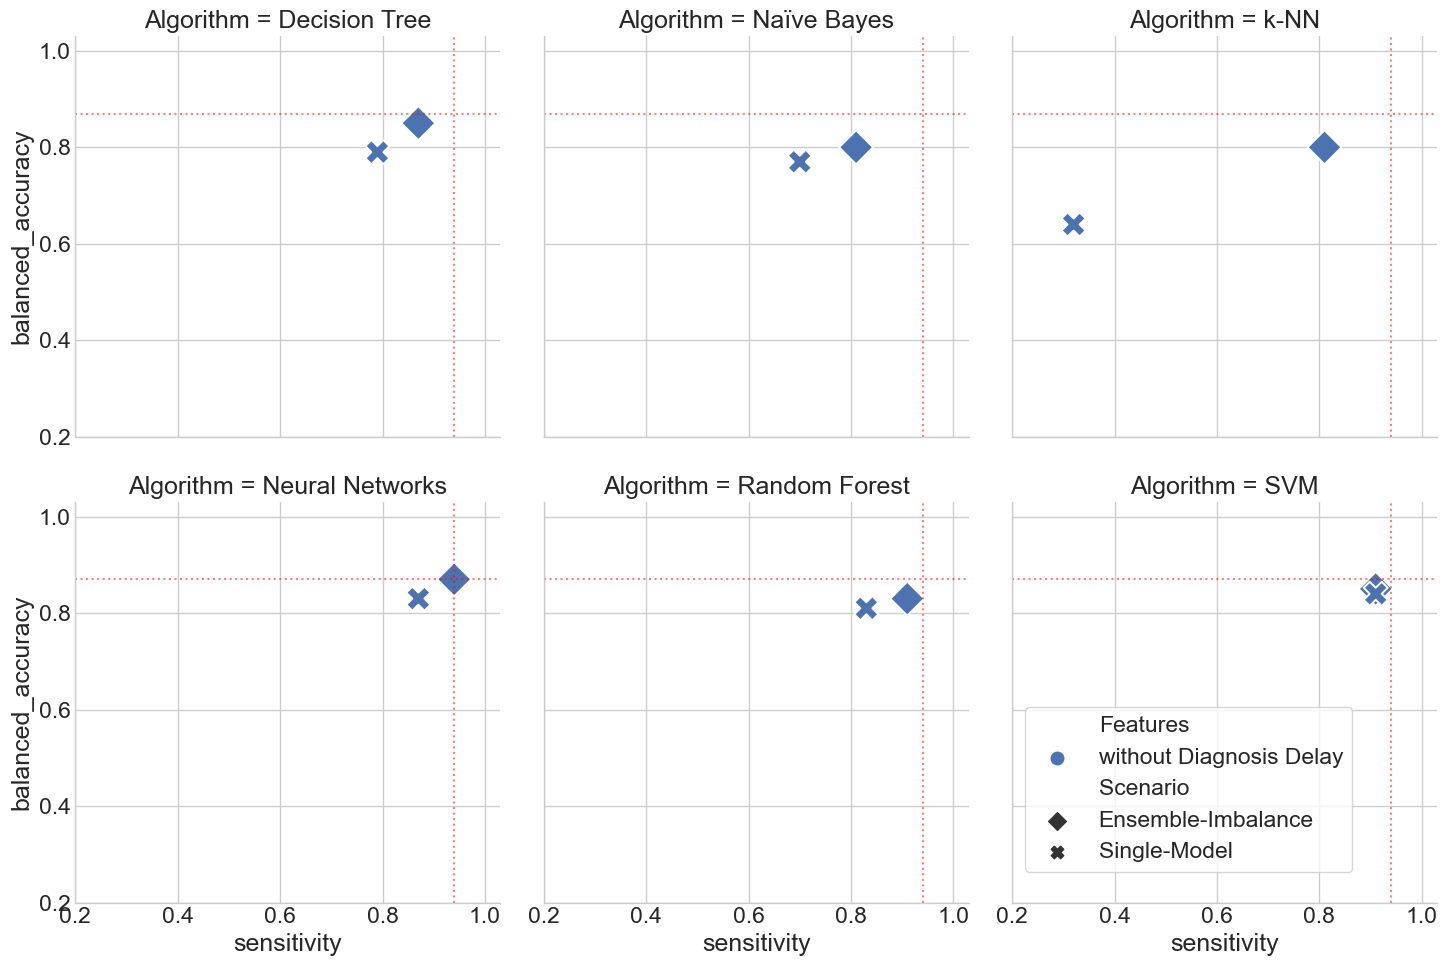

In [10]:
features_config = ['All_Features', 'without_Diagnosis_Delay']

for features in features_config:
    df_aux = df_all.loc[(df_all.Features == features)]

    df_aux.sort_values(by=['balanced_accuracy','sensitivity','specificity'], 
                       ascending=[False, False, False], inplace=True)

    df_aux = df_aux.groupby(by=['Algorithm','Scenario']).first().reset_index()

    df_aux.Scenario = df_aux.Scenario.str.replace('_', '-')
    df_aux.Features = df_aux.Features.str.replace('_', ' ')

    df_aux = df_aux.loc[
        (df_aux.Algorithm != 'ComplementNB')
       &(df_aux.Algorithm != 'RadiusNeighbors')
    ]


    df_aux.Algorithm = df_aux.Algorithm.apply(lambda x: utils.get_model_description(x))

#     df_aux = utils_exec_models_new.sort_performances_results(df=df_aux).drop(columns=['index'])

    display(df_aux)
    
    plot_performances_by_algorithm(df_aux)

# Separate the performances into $balanced$ and $non\_balanced$ files and save them

In [15]:
models_balanced_param = {
        'DecisionTree': "'class_weight':'balanced'",
        'SVC': "'class_weight':'balanced'",
        'RandomForest': "'class_weight':'balanced" , # will serve to 'balanced' and 'balanced_subsample'
        'BalancedBaggingClassifier': "''class_weight':'balanced''"
    }


results_folder = path #'0_exec_results_py'
path = os.path.abspath(results_folder)


results_by_algorithm = []
algorithms = set()
scenarios = set()
features_configs = set()

for root, folders, files in os.walk(path, topdown=False):

    for name in files:
        if root.endswith(results_folder) and name.startswith('performance__') and name.endswith('.csv'):
#             print(root, folders, files)
            
            #
            aux = name.replace('.csv', '').replace('performance__','').split('__')
            algo = aux[0]
            feat = aux[1]
            scen = aux[2]
            es_algo = aux[3] if len(aux) == 4 else ''

#             if scen == 'Single_Model':
            if algo in models_balanced_param.keys():
                print(algo)
                df_aux = utils.read_csv(csv_file=os.path.join(root, name))

                # get models that used 'balanced' param 
                balanced_param = models_balanced_param[algo]

                # define wich column will be used to get hyperparams
                col_hyperparams = 'Hyperparams' if scen == 'Single_Model' else 'Estimator_Hyperparams'
                    

                # filter by hyperparams for non-Ensemble-Balance models
                df_bal = df_aux.loc[(df_aux[col_hyperparams].str.contains(balanced_param, regex=False))].copy()

                df_bal = utils_exec_models_new.sort_performances_results(df=df_bal)

                # get models that DONT used 'balanced' param 
                df_not_bal = df_aux.loc[(df_aux[col_hyperparams].str.contains(balanced_param, regex=False)==False)].copy()
                df_not_bal = utils_exec_models_new.sort_performances_results(df=df_not_bal)

                # save the separated results
                csv_to_save = f'{path}/separated_results/{algo}__{feat}__{scen}__{es_algo}__balanced.csv'
                utils.save_to_csv(df=df_bal, csv_file=csv_to_save)

                csv_to_save = f'{path}/separated_results/{algo}__{feat}__{scen}__{es_algo}__not_balanced.csv'
                utils.save_to_csv(df=df_not_bal, csv_file=csv_to_save)


RandomForest
64 samples were saved
32 samples were saved
DecisionTree
1080 samples were saved
0 samples were saved
DecisionTree
16 samples were saved
16 samples were saved
DecisionTree
16 samples were saved
16 samples were saved
RandomForest


AttributeError: Can only use .str accessor with string values!

# Plot 1

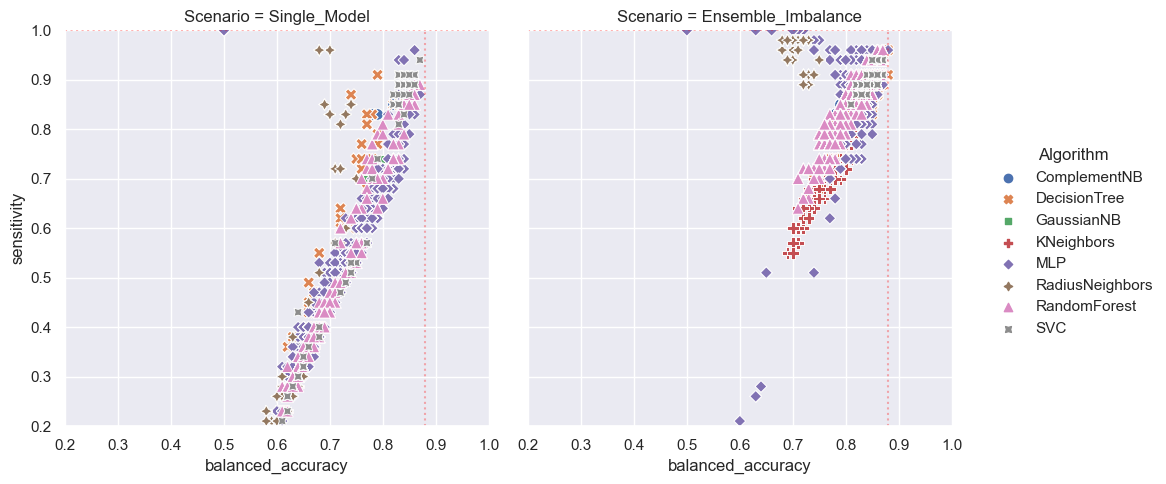

In [25]:
g = sns.relplot(
    data=df_all, 
    x="balanced_accuracy", 
    y="sensitivity",
    col="Scenario", 
    hue="Algorithm", 
    style="Algorithm",
    kind="scatter",
    s=70
)
plt.ylim(0.20, 1.0)
plt.xlim(0.20, 1.0)

g.refline(y=df_all.sensitivity.max(), linestyle=":", c='red', alpha=0.3, label='')
g.refline(x=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)


# Plot 2

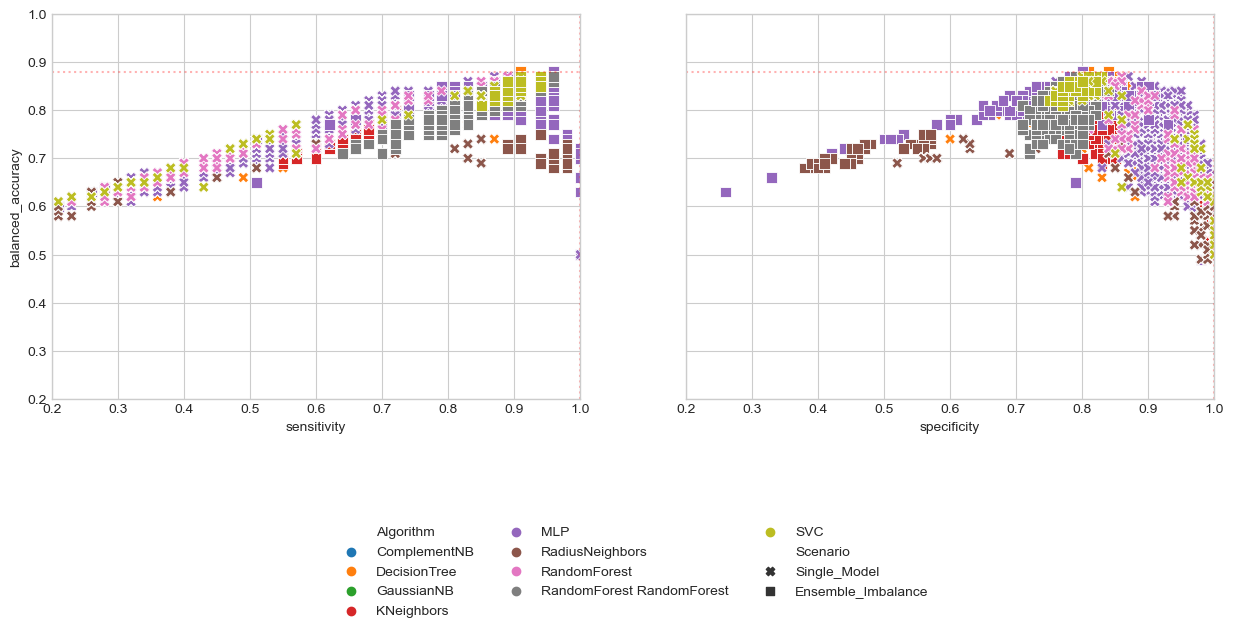

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharey=True)

g = sns.scatterplot(
    ax=axs[0],
    data=df_all, 
    x="sensitivity", 
    y="balanced_accuracy", 
    hue="Algorithm", 
    style="Scenario",
    markers={"Single_Model": "X", "Ensemble_Imbalance": "s"},
    s=60,
    legend=False,
)
axs[0].set_ylim(0.2, 1.0)
axs[0].set_xlim(0.2, 1.0)

axs[0].axvline(x=df_all.sensitivity.max(), linestyle=":", c='red', alpha=0.3)
axs[0].axhline(y=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)


sns.scatterplot(
    ax=axs[1],
    data=df_all, 
    x="specificity", 
    y="balanced_accuracy", 
    hue="Algorithm", 
    style="Scenario",
    markers={"Single_Model": "X", "Ensemble_Imbalance": "s"},
    s=60,
)
axs[1].set_ylim(0.2, 1.0)
axs[1].set_xlim(0.2, 1.0)

axs[1].axvline(x=df_all.specificity.max(), linestyle=":", c='red', alpha=0.3)
axs[1].axhline(y=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)

plt.legend(loc='lower center', bbox_to_anchor=(-0.1, -0.6), ncol=3)


# Plot by algorithm 

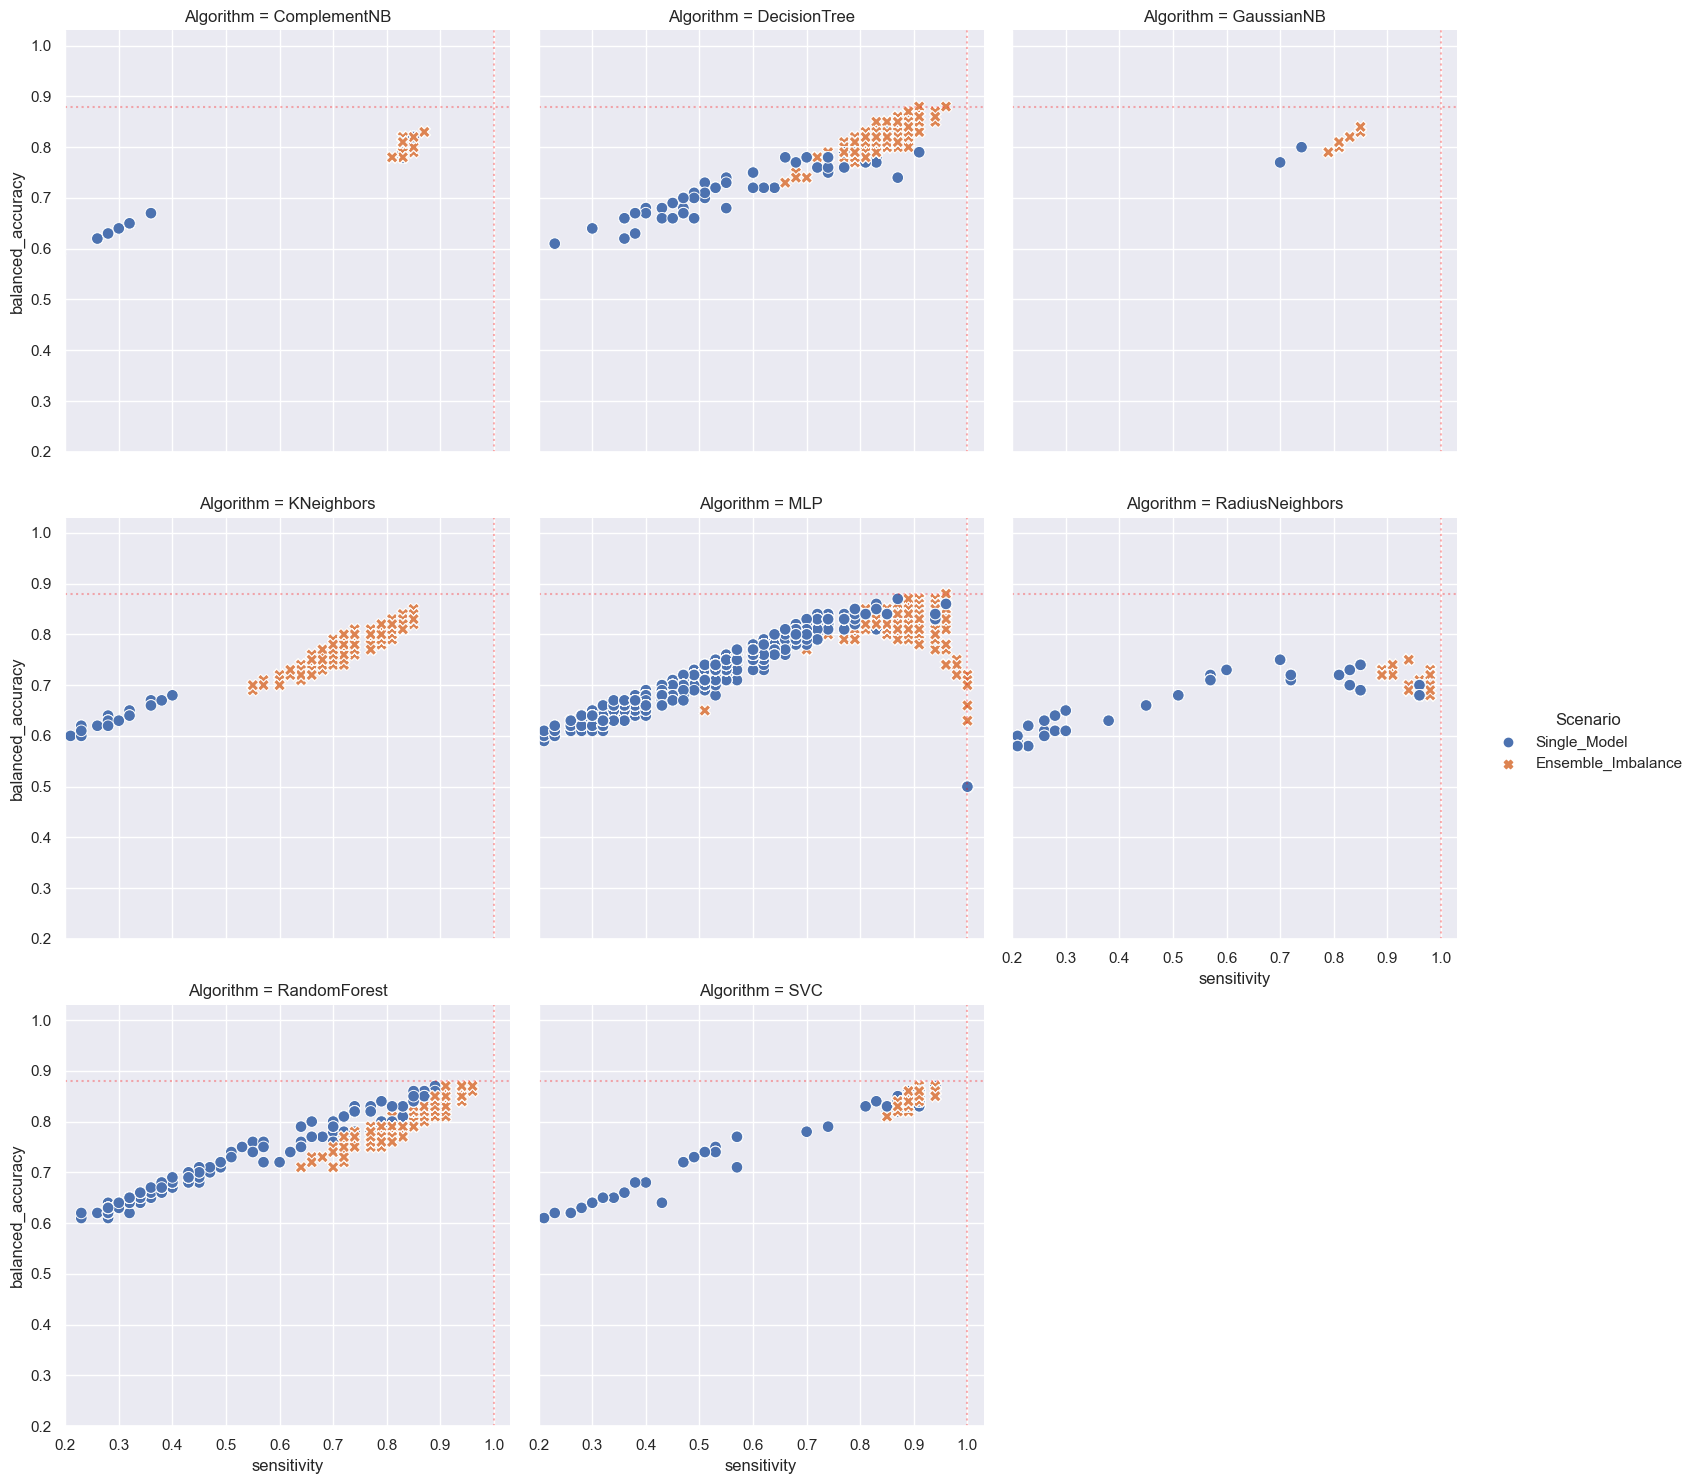

In [26]:
g = sns.relplot(
    data=df_all, 
    y="balanced_accuracy", 
    x="sensitivity",
    hue="Scenario", 
    col="Algorithm", 
    style="Scenario",
    kind="scatter",
    s=70,
    col_wrap=3,
)
plt.ylim(0.20, 1.03)
plt.xlim(0.20, 1.03)

g.refline(x=df_all.sensitivity.max(), linestyle=":", c='red', alpha=0.3, label='')
g.refline(y=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)
